---
---

<h1><center><ins>Exercise Sheet 5</ins></center></h1>
<h2><center>Numerical Methods <br>

---
---

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, cos, sin, pi, sqrt
import sympy as sp

## Exercise 1 - Numerical derivative

**(A)** Compute the derivative of the following two functions:

$$ f_1(x) = x^2 + \cos(x) $$

$$ f_2(x) = \exp(x) - x^3 $$

in correspondence of at least $N = 50$ values $x_i$ ($i = 1, ..., N$) of the variable $x$ in the interval $[1,5]$. To do this, *write your own code to compute the derivatives numerically*.

**(B)** Compare the resulting values you get for the numerical derivatives with the corresponding analytic solutions. Calculate the value of the quantity $q$ for each function:

$$ q = \sum_{i=1}^N \frac{\left[d_i - f'(x_i) \right]}{f'(x_i)} $$

where $d_i$ are the values you obtained for the numerical derivatives for each of the $N$ abscissas, and $f'(x_i)$ are the analytical derivatives evaluated in points $x_i$. How does the value of $q$ change when changing the value of $h$ to compute the derivatives numerically? How do the values of $q$ compare for the two functions? Discuss your findings.

q1 = -1.761e-10
q2 = 2.472e-10


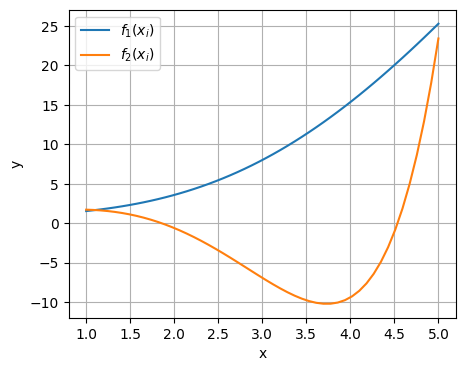

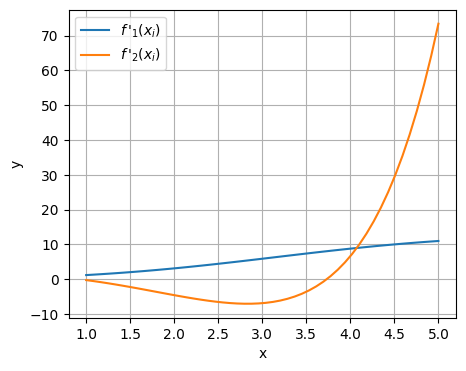

In [160]:
# a

def f1(x):
    return x**2 + cos(x)

def f2(x):
    return exp(x) - x**3

def df_num(x, f, h):
    df = (f(x+h) - f(x-h)) / (2*h)
    return df

def df1(x):
    return 2*x - sin(x)

def df2(x):
    return exp(x) -3*x**2


xi = np.linspace(1, 5, 50)
h = 1e-5 # interestingly around 5 is the best value for h

df1_num = df_num(xi, f1, h)
df2_num = df_num(xi, f2, h)


q1 = np.sum((df1_num-df1(xi)) / df1(xi))
q2 = np.sum((df2_num-df2(xi)) / df2(xi))

print(f"q1 = {q1:.3e}\nq2 = {q2:.3e}")


plt.figure(figsize=(5,4))
plt.plot(xi, f1(xi), label="$f_1$($x_i$)")
plt.plot(xi, f2(xi), label="$f_2$($x_i$)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()

plt.figure(figsize=(5,4))
plt.plot(xi, df1_num, label="$f\\,'_1$($x_i$)")
plt.plot(xi, df2_num, label="$f\\,'_2$($x_i$)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

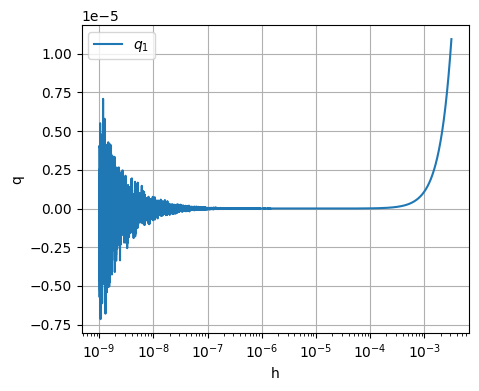

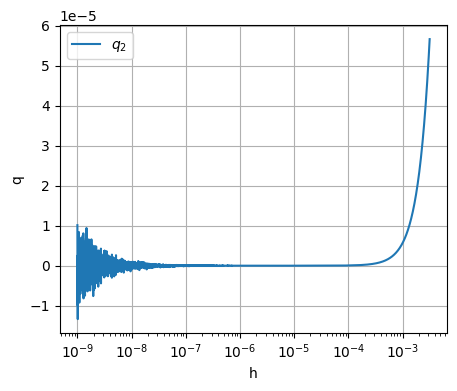

In [161]:
h_int = np.logspace(-9, -2.5, 5000)

q1_test = []
q2_test = []
for h in h_int:
    q1 = np.sum((df_num(xi,f1,h)-df1(xi)) / df1(xi))
    q2 = np.sum((df_num(xi,f2,h)-df2(xi)) / df2(xi))
    q1_test.append(q1)
    q2_test.append(q2)
    

plt.figure(figsize=(5,4))
plt.plot(h_int, q1_test, label="$q_1$")
plt.xlabel("h")
plt.ylabel("q")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.legend()

plt.figure(figsize=(5,4))
plt.plot(h_int, q2_test, label="$q_2$")
plt.xlabel("h")
plt.ylabel("q")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

## Exercise 2 - Newton-Cotes formulas

In the file ```surface_luminosity.txt``` you will find the numerical function describing the surface luminosity $\Sigma$ of a globular star cluster as a function of the distance $R$ from its centre (projected on the plane of the sky). Compute the total luminosity $L$ of the system by performing the integral

$$ L = \int_0^{R_{\text{max}}} \Sigma(R) \, 2 \pi R \, dR $$

using the trapezoid rule and Simpson's rule, and compare the results you obtain. To do this, first choose one of these methods and implement **your own algorithm to compute the integral with it**; for the other method, use the corresponding built-in python function ```scipy.integrate.trapz``` or ```scipy.integrate.simps``` and familiarize on its usage.

In [162]:
from scipy.integrate import simpson, trapezoid

data = np.loadtxt("surface_luminosity.txt")
R = data[:,0]
Sigma = data[:,1]

def trapz(x, y):
    s = 0
    for i in range(len(x)-1):
        dx = x[i+1] - x[i]
        s += 0.5 * (y[i] + y[i+1]) * dx
    return s


integrand = Sigma * 2*pi * R

L_trapz_own = trapz(R, integrand)

L_simps = simpson(integrand, R)
L_trapz = trapezoid(integrand, R)

print(f"Trapez (own): {L_trapz_own:.2f}\nTrapez (sympy): {L_trapz:.2f}\nSimpson: {L_simps:.2f}")

Trapez (own): 1285408.71
Trapez (sympy): 1285408.71
Simpson: 1282549.63


## Exercise 3 - Gaussian Quadrature

**(A)** Compute the following integral by using a 4-point Gaussian quadrature. 

$$ I = \int_{-1}^{1} \cos(x) dx $$

To do this, use the Legendre polynomial of degree 4:

$$ P_4(x) = \frac{1}{8}(35 x^4 - 30 x^2 +3) $$

At this link: https://en.wikipedia.org/wiki/Gauss%E2%80%93Legendre_quadrature you can find the roots of Legendre polynomials and the necessary weights to solve the integral (i.e., you do not have to calculate them all from scratch!).

**(B)** Compare the result with the ones you obtain when using a Legendre polynomial of degree 3, 2, and 1, and comment your findings.

In [202]:
x1 = sqrt(3/7 - 2/7 * sqrt(6/5))
x2 = sqrt(3/7 + 2/7 * sqrt(6/5))

w1 = (18 + sqrt(30)) / 36
w2 = (18 - sqrt(30)) / 36

x = np.array([x1, -x1, x2, -x2])
weights = np.array([w1,w1,w2,w2])

# integrand
f = np.cos(x)

# Gaussian quadrature
I_4 = np.sum(weights * f)

print(I_4)

1.6829416886959736


In [201]:
f = lambda x: cos(x)

gauss_data = {
    1: { 'nodes': [0.0], 'weights': [2.0] },
    2: { 'nodes': [-1/sqrt(3), 1/sqrt(3)], 'weights': [1.0, 1.0] },
    3: { 'nodes': [-sqrt(3/5), 0.0, sqrt(3/5)], 'weights': [5/9, 8/9, 5/9] },
}

# Compute integral for different degrees
for n in range(1, 4):
    nodes = gauss_data[n]['nodes']
    weights = gauss_data[n]['weights']
    
    I = sum(w * f(x) for x, w in zip(nodes, weights))
    print(f"Degree {n}: I ≈ {I:.8f}")

print(f"Degree 4: I ≈ {I_4:.8f}")
# Compare with exact integral
I_exact = np.sin(1) - np.sin(-1)
print(f"Exact integral: I = {I_exact:.8f}")

Degree 1: I ≈ 2.00000000
Degree 2: I ≈ 1.67582366
Degree 3: I ≈ 1.68300355
Degree 4: I ≈ 1.68294169
Exact integral: I = 1.68294197


## Exercise 4 - Monte Carlo integration 

Consider the following integral:
$$ I = \int_0^1 \cos \left(\frac{\pi x}{2} \right) dx = \frac{2}{\pi} $$

**(A)** Compute the above integral and its variance by using the following Monte Carlo methods:

1. mean value

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.



Monte Carlo estimate: I ≈ 0.63676331
Estimated variance: Var(I) ≈ 9.50e-07
Exact integral: I = 0.63661977
Difference = 0.00014354


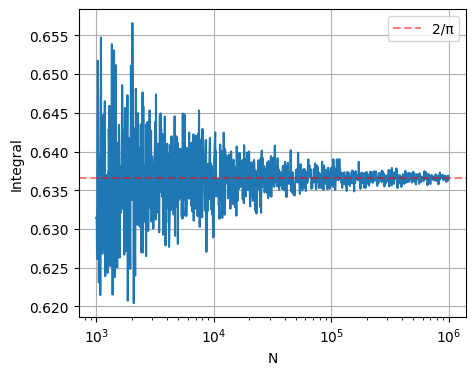

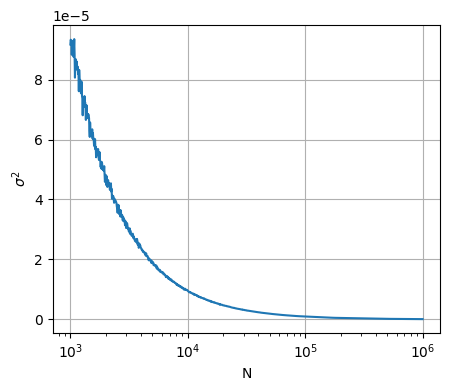

In [ ]:
# a
f = lambda x: np.cos(np.pi * x / 2)
N = 100000

# Generate random points in [0,1]
x = np.random.rand(N)

# Monte Carlo estimate of the integral (mean value method)
I_mc = np.mean(f(x)) # (b-a) = (1-0)

# Estimate of the variance
variance_mc = np.var(f(x)) / N

print(f"Monte Carlo estimate: I ≈ {I_mc:.8f}")
print(f"Estimated variance: Var(I) ≈ {variance_mc:.2e}")

I_exact = 2 / pi
print(f"Exact integral: I = {I_exact:.8f}\nDifference = {np.abs(I_mc-I_exact):.8f}")

# b
N = np.logspace(3,6, 1000)
I_test = []
v_test = []
for n in N:
    n = int(n)
    x = np.random.rand(n)
    I = np.mean(f(x))
    v = np.var(f(x)) / n
    I_test.append(I)
    v_test.append(v)

plt.figure(figsize=(5,4))
plt.plot(N, I_test)
plt.axhline(2/pi, color="red", linestyle="--", alpha=0.5, label="2/π")
plt.xlabel("N")
plt.ylabel("Integral")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.legend()

plt.figure(figsize=(5,4))
plt.plot(N, v_test)
plt.xlabel("N")
plt.ylabel("$σ^2$")
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
plt.show()

## Exercise 5 - Monte Carlo integration continued (optional)

**(A)** Compute the above integral from Exercise 4 and its variance by using the other Monte Carlo methods covered in the lecture:

2. importance sampling
3. control variates
4. antithetic variates

How do your results compare with the true value of the integral?

**(B)** Plot the behaviour of $I$ and of the variance $\sigma_{I}$ as a function of the number $N$ of points you generate for each of the methods. Consider at least 3 different values of $N$.

In [237]:
# importance sampling
# Example PDF: p(x) = 2*(1-x) over [0,1]
p = lambda x: 2*(1-x)
N = 100000
# Inverse CDF method to sample x ~ p(x)
u = np.random.rand(N)
x_imp = 1 - np.sqrt(1-u)  # Inverse CDF of p(x)

I_imp = np.mean(f(x_imp)/p(x_imp))
var_imp = np.var(f(x_imp)/p(x_imp))/N

print(f"Importance sampling: I ≈ {I_imp:.8f}, Var ≈ {var_imp:.8e}")

# control variates
g = lambda x: 1 - x
I_g = 0.5

x_cv = np.random.rand(N)
cov_fg = np.cov(f(x_cv), g(x_cv))[0,1]
var_g = np.var(g(x_cv))
alpha = cov_fg / var_g

I_cv = np.mean(f(x_cv) - alpha*(g(x_cv)-I_g))
var_cv = np.var(f(x_cv) - alpha*(g(x_cv)-I_g)) / N

print(f"Control variates: I ≈ {I_cv:.8f}, Var ≈ {var_cv:.8e}")

#antithetic variates
x_half = np.random.rand(N//2)
I_av = np.mean(0.5*(f(x_half)+f(1-x_half)))
var_av = np.var(0.5*(f(x_half)+f(1-x_half))) / (N//2)

print(f"Antithetic variates: I ≈ {I_av:.8f}, Var ≈ {var_av:.8e}")


print(f"\nExact integral: I = {I_exact:.8f}\n\
Difference to importance sampling = {np.abs(I_imp-I_exact):.8f}\n\
Difference to control variates = {np.abs(I_cv-I_exact):.8f}\n\
Difference to antithetic variates = {np.abs(I_av-I_exact):.8f}")

Importance sampling: I ≈ 0.63706465, Var ≈ 6.79734621e-08
Control variates: I ≈ 0.63670803, Var ≈ 3.92078517e-08
Antithetic variates: I ≈ 0.63686515, Var ≈ 7.78573145e-08

Exact integral: I = 0.63661977
Difference to importance sampling = 0.00044488
Difference to control variates = 0.00008826
Difference to antithetic variates = 0.00024538


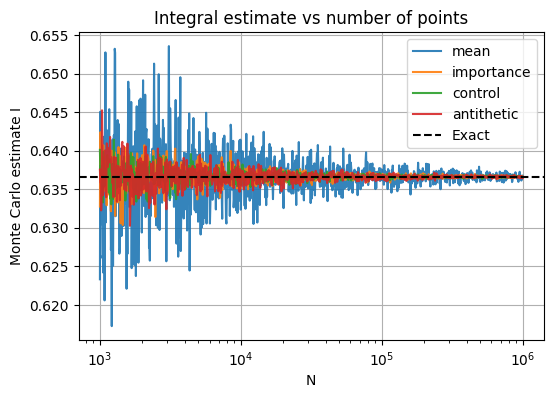

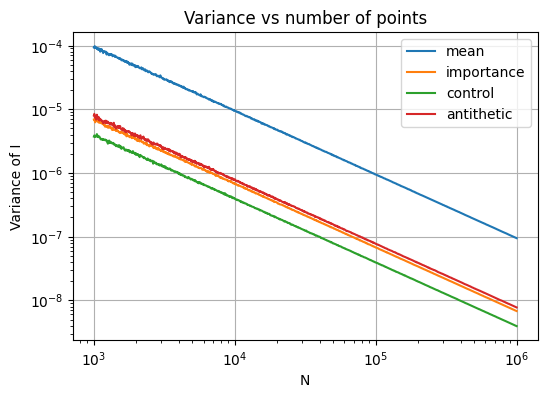

In [263]:
# Number of points to test
N_values = np.logspace(3,6, 1000)

# Store results
methods = ['mean', 'importance', 'control', 'antithetic']
I_results = {m: [] for m in methods}
var_results = {m: [] for m in methods}

for N in N_values:
    N = int(N)
    # --- Mean value method ---
    x = np.random.rand(N)
    I_mv = np.mean(f(x))
    var_mv = np.var(f(x))/N
    I_results['mean'].append(I_mv)
    var_results['mean'].append(var_mv)
    
    # --- Importance sampling ---
    u = np.random.rand(N)
    x_imp = 1 - np.sqrt(1-u)  # PDF p(x)=2(1-x)
    I_imp = np.mean(f(x_imp)/(2*(1-x_imp)))
    var_imp = np.var(f(x_imp)/(2*(1-x_imp)))/N
    I_results['importance'].append(I_imp)
    var_results['importance'].append(var_imp)
    
    # --- Control variates ---
    x_cv = np.random.rand(N)
    cov_fg = np.cov(f(x_cv), g(x_cv))[0,1]
    var_g = np.var(g(x_cv))
    alpha = cov_fg / var_g
    I_cv = np.mean(f(x_cv) - alpha*(g(x_cv)-I_g))
    var_cv = np.var(f(x_cv) - alpha*(g(x_cv)-I_g))/N
    I_results['control'].append(I_cv)
    var_results['control'].append(var_cv)
    
    # --- Antithetic variates ---
    x_half = np.random.rand(N//2)
    I_av = np.mean(0.5*(f(x_half)+f(1-x_half)))
    var_av = np.var(0.5*(f(x_half)+f(1-x_half)))/(N//2)
    I_results['antithetic'].append(I_av)
    var_results['antithetic'].append(var_av)

# --- Plot integral estimates ---
plt.figure(figsize=(6,4))
for m in methods:
    plt.plot(N_values, I_results[m], alpha=0.9, label=m)
plt.axhline(2/np.pi, color='k', linestyle='--', label='Exact')
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Monte Carlo estimate I')
plt.title('Integral estimate vs number of points')
plt.legend()
plt.grid(True)

# --- Plot variances ---
plt.figure(figsize=(6,4))
for m in methods:
    plt.plot(N_values, var_results[m], label=m)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Variance of I')
plt.title('Variance vs number of points')
plt.legend()
plt.grid(True)
plt.show()
